# Ejercicio Integrador

1- Bajar los datos de OHLC de todoslos tickers del SP500 desde el año 2000

2- Armar un dataframe con los cierres y otro con las aperturas de todos los tickers

3- Calcular los rendimientos (logarítmicos) de los GAPS e Intradiarios de todos los días de la semana para el promedio de los 500 tickers, agrupados por día de la semana

4- Graficar con histogramas, y BoxPlots y sacar conculsiones

In [2]:
#=================================#
#          Ejercicio 1            #
#=================================#

import yfinance as yf
import numpy as np
import pandas as pd

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [e for e in sp500_tickers if e not in ('BRK.B','BF.B')]

data = yf.download(sp500_tickers, auto_adjust=True, start='2000-01-01')

[*********************100%***********************]  503 of 503 completed


In [3]:
#=================================#
#          Ejercicio 2            #
#=================================#

cierres = data['Close']
aperturas = data['Open']

In [4]:
#=================================#
#          Ejercicio 3            #
#=================================#


retornos_gaps = np.log(aperturas/cierres.shift(1)).fillna(0)
retornos_intra = np.log(cierres/aperturas).fillna(0)

dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']

mat_ret_gaps = retornos_gaps.groupby(retornos_gaps.index.dayofweek).mean()*250
mat_ret_gaps.index = dias

mat_ret_intra = retornos_intra.groupby(retornos_intra.index.dayofweek).mean()*250
mat_ret_intra.index = dias

resumen_intra = mat_ret_intra.transpose()
resumen_gaps = mat_ret_gaps.transpose()

In [5]:
resumen_intra.describe()

,Lunes,Martes,Miercoles,Jueves,Viernes
count,503.000000,503.000000,503.000000,503.000000,503.000000
mean,-0.068600,0.050024,0.058184,0.110932,0.058541
std,0.205211,0.158126,0.147738,0.177642,0.168997
min,-0.871637,-0.499295,-0.510068,-0.648526,-0.639738
25%,-0.174280,-0.044558,-0.027755,0.010046,-0.031563
50%,-0.041206,0.051452,0.062739,0.119354,0.066734
75%,0.066237,0.147217,0.153609,0.225952,0.161540
max,0.474351,0.456001,0.577846,0.695417,0.698048


In [6]:
resumen_gaps.describe()

,Lunes,Martes,Miercoles,Jueves,Viernes
count,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.029310,0.138838,0.048296,0.026792,0.054691
std,0.129251,0.121831,0.107936,0.119182,0.099908
min,-0.424265,-0.191028,-0.282004,-0.625757,-0.273750
25%,-0.042645,0.062845,-0.020600,-0.047473,-0.005439
50%,0.016094,0.122485,0.034637,0.014795,0.050693
75%,0.087644,0.201355,0.104626,0.089033,0.098067
max,0.755169,0.652316,0.476661,0.503677,0.652147


<AxesSubplot:title={'center':'KDEs GAPS'}, ylabel='Density'>

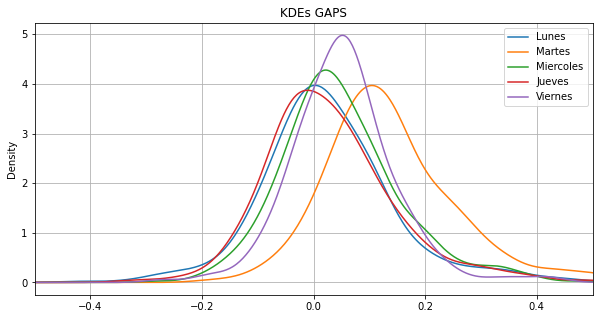

In [10]:
#=================================#
#          Ejercicio 4            #
#=================================#

# GAPS - KDEs
# Les muestro la respuesta con KDEs en lugar de histogramas para varias un poco a lo que mostre en clase :)


dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']

series = []
for dia in dias:
    series.append(resumen_gaps[dia])
    

df = pd.concat(series, axis=1)
df.plot(kind='kde', grid=True, figsize=(10,5), label=dia, xlim=(-.5,.5), title='KDEs GAPS')

<AxesSubplot:title={'center':'KDEs Intradiarios'}, ylabel='Density'>

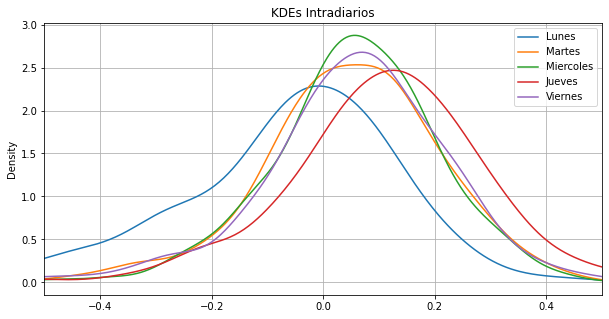

In [9]:
#=================================#
#          Ejercicio 4            #
#=================================#

# Intradiarios - KDEs


series = []
for dia in dias:
    series.append(resumen_intra[dia])
    

df = pd.concat(series, axis=1)
df.plot(kind='kde', grid=True, figsize=(10,5), label=dia, xlim=(-.5,.5), title='KDEs Intradiarios')

<AxesSubplot:>

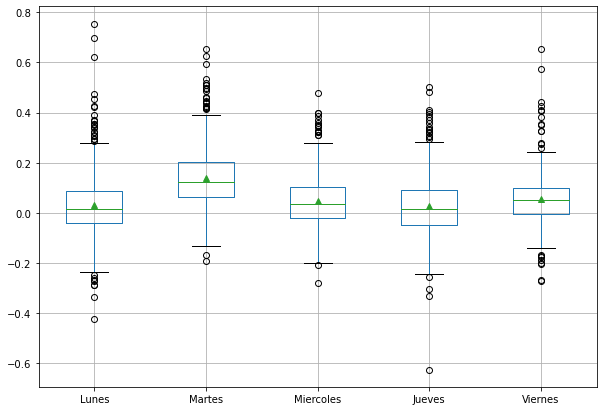

In [13]:
#=================================#
#          Ejercicio 4            #
#=================================#

# GAPS - BoxPlots



pd.plotting.boxplot_frame(resumen_gaps, whis=1.5, showmeans=True, figsize=(10,7))

<AxesSubplot:>

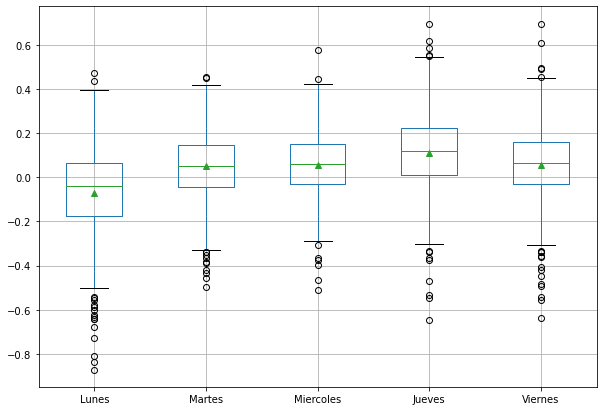

In [14]:
#=================================#
#          Ejercicio 4            #
#=================================#

# Intradiarios - BoxPlots


pd.plotting.boxplot_frame(resumen_intra, whis=1.5, showmeans=True, figsize=(10,7))